In [1]:
import numpy as np #Import Python Library (This is where the data is stored and pulled from the csv)
import pandas as pd # Import software library (This is a software library written for python) This library is used for data manipulation and analysis
import matplotlib.pyplot as plt #Import plotting library (This is used to display graphical data)
import scipy.stats as stats #Import python library (This is used for scientific computations)

In [2]:
data0 = np.genfromtxt('Geneva Ionomics_Z_Spec_as_int.csv',delimiter = ',', skip_header = 1) # This generates data from the csv text
data0 = pd.DataFrame(data0) # This arranges the csv data into an object that pandas can use
data = data0.drop(data0.columns[0:2],axis = 1) # This removes columns one and two which are the plant species and plant number,these will be added back in the final step
plt.rcParams['figure.figsize'] = (20,10) # This sets the parameters for the size of the figure

In [3]:
data.loc[163,16] = np.nan #this removes a value in As75 for indv 588355

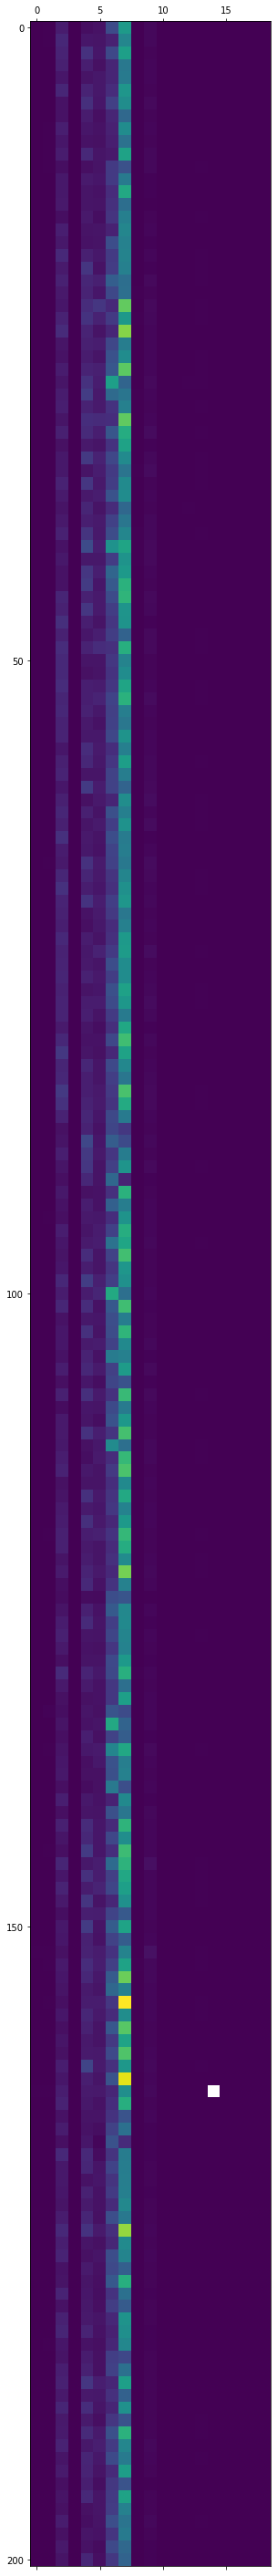

In [4]:
plt.figure(figsize=(5,50)) # This sets the parameters of the following figure which is a heatmap
plt.matshow(data,fignum =1) # This shows the graphic of the heatmap

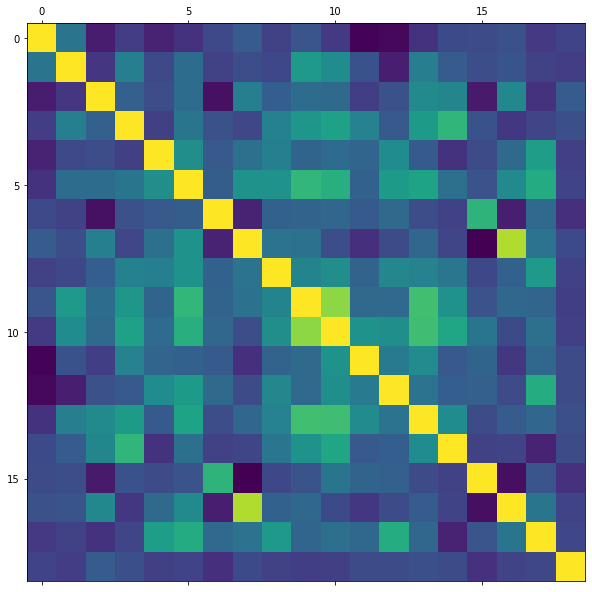

In [5]:
plt.matshow(data.corr()) # This creates the correlation matrix shown below

In [6]:
z = pd.DataFrame(np.arange(4221).reshape(201,21)) #This creates a dummy dataframe for our z value
z = z.astype('float32') #Float is used when storing data with decimal points to keep it precise 
z.drop(z.columns[0:2],axis = 1, inplace = True ) #This drops two columns in our dummy dataframe

In [7]:
for x in range(2,(data.shape[1]+2)): #This gives the dimensions of the array along the x axis
    for y in range(data.shape[0]): #This gives the dimension of the array along the y axis
        if data[x][y] < 0: #If the data obtained is less than zero
            data[x][y] = "NaN" #Then it is not treated as a number

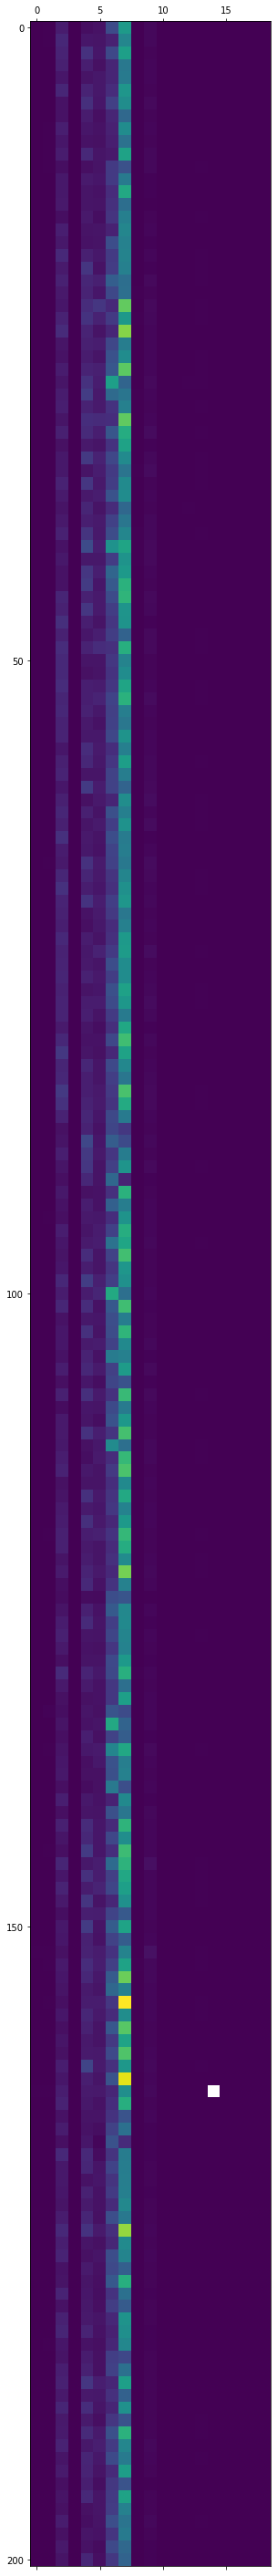

In [8]:
plt.figure(figsize=(5,50)) #This sets the figure size
plt.matshow(data,fignum =1) #This shows the graphic of the heatmap

In [9]:
f = pd.DataFrame(np.arange(4221).reshape(201,21)) #This means that all of the date on the right side of the equals sign is now denoted as f,pd dataframe means we are pulling the dataframe from the pandas library,the dot means we are choosing one function called dataframe fromthe library,np.arrange measn we are choosing the arrange function form the numpy library,we are analyzing (4221) data points from our csv file and reshaping them into 201 columns and 21 rows       
f = f.astype(str) #This coverts the data denoted as f into a new type called string
f[0] = data0[0] #This means that column zero in dataframe f is coulmn zero in dataframe zero
f[1] = data0[1] #This means that column one in dataframe f is column one in dataframe zero
for x in range(2,(data.shape[1])+2): #Counts through columns
    f[x] = data[x] #This means that every column in f equals every column in z,this is the operation where we are adding abck the two columns that were dropped back at the beginning 
f

,0,1,2,3,4,5,6,7,8,9,...,11,12,13,14,15,16,17,18,19,20
0,318684.0,1.0,75.649837,239.783324,3694.495174,26.954521,1696.651865,2342.846773,10844.525770,25804.62520,...,1053.678753,0.346976,0.854512,17.502683,173.651460,0.015994,3.405492,40.071653,0.207729,0.038481
1,588141.0,1.0,80.703292,186.700348,5272.952628,27.332428,2874.830875,2619.560521,4439.195121,21781.91107,...,971.632025,0.303920,0.653269,33.540070,166.042457,0.026768,0.797610,39.555675,0.385602,0.044398
2,588646.0,1.0,64.613696,82.762535,4810.860542,31.539338,6719.389066,2959.531369,10286.453500,26848.07659,...,718.672696,0.216677,0.459874,39.773775,142.738457,0.022345,1.138830,30.526020,0.603184,0.036700
3,588378.0,1.0,65.268254,126.855712,4155.981678,31.633060,4043.255680,2038.467250,4956.167866,19014.47633,...,802.953098,0.198971,0.371279,15.532497,144.923406,0.026359,0.877615,18.750390,0.267194,0.035098
4,588459.0,1.0,107.364963,164.496026,2852.011467,44.532515,2539.038881,3144.883915,4865.589820,19274.51258,...,768.216649,0.322162,0.725153,21.697605,138.732870,0.037928,2.027483,21.487108,0.492434,0.036243
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
196,483190.0,8.0,48.536580,32.168971,2209.598165,14.134714,2181.648019,2627.568246,8396.316486,20759.67769,...,673.215585,0.168725,0.361811,17.331910,113.663336,0.016044,0.295842,29.927596,0.059150,0.035793
197,483187.0,8.0,131.126712,125.924591,3648.981511,37.975758,1741.839911,2593.355026,11480.121400,18268.26592,...,1003.091895,0.359253,0.955471,26.886824,215.327112,0.060461,0.697936,21.743809,0.083999,0.062617
198,483184.0,8.0,52.693624,61.559929,2069.169038,25.985398,2624.084929,2350.078662,7402.173410,19336.67285,...,582.196201,0.233047,0.568838,33.540528,110.259042,0.016785,0.631063,20.281851,0.697223,0.036652
199,483188.0,8.0,111.486494,44.384571,3225.072889,15.559335,2283.284730,1619.680719,10420.063280,15999.02234,...,456.245290,0.169485,0.496859,35.303743,95.415164,0.014863,0.767645,16.442089,0.688231,0.023213


In [10]:
f.to_csv('Transformed_Boxplots_Z.csv',header = ('INVO','Spec_int','B11','Na23','Mg26','Al27','P31','S34','K39','Ca44','Fe54','Mn55','Co59','Ni60','Cu63',
                                      'Zn66','As75','Rb85','Sr88','Mo98','Cd111'))